# t-distributed stochastic neighbor embedding

## Example 1 
MNIST 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [2]:
#Prepare the data
digits = datasets.load_digits(n_class = 6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

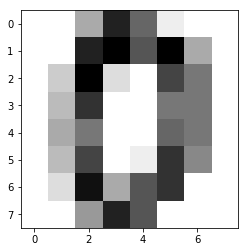

In [3]:
plt.imshow(X[0].reshape(8, 8), plt.cm.binary)
plt.show()

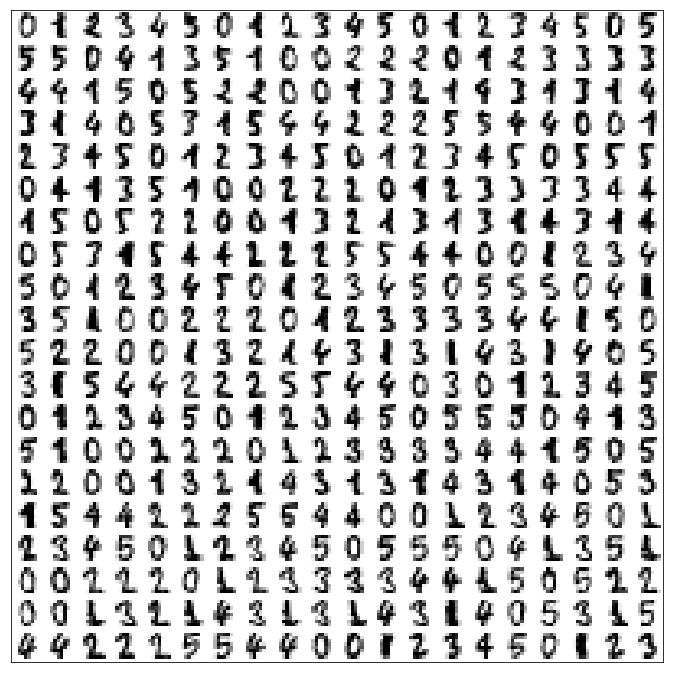

In [4]:
n = 20  
img = np.zeros((10 * n, 10 * n))

for i in range(n):
    
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        img[ix : ix + 8, iy : iy + 8] = X[i * n + j].reshape((8, 8))
        
plt.figure(figsize = (12, 12))
plt.imshow(img, cmap = plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
#t-SNE
X_tsne = manifold.TSNE(n_components = 2, init = 'random', perplexity = 30, random_state = 0, verbose = 1).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1083 samples in 0.006s...
[t-SNE] Computed neighbors for 1083 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1083
[t-SNE] Computed conditional probabilities for sample 1083 / 1083
[t-SNE] Mean sigma: 8.151373
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.542454
[t-SNE] KL divergence after 1000 iterations: 0.597632


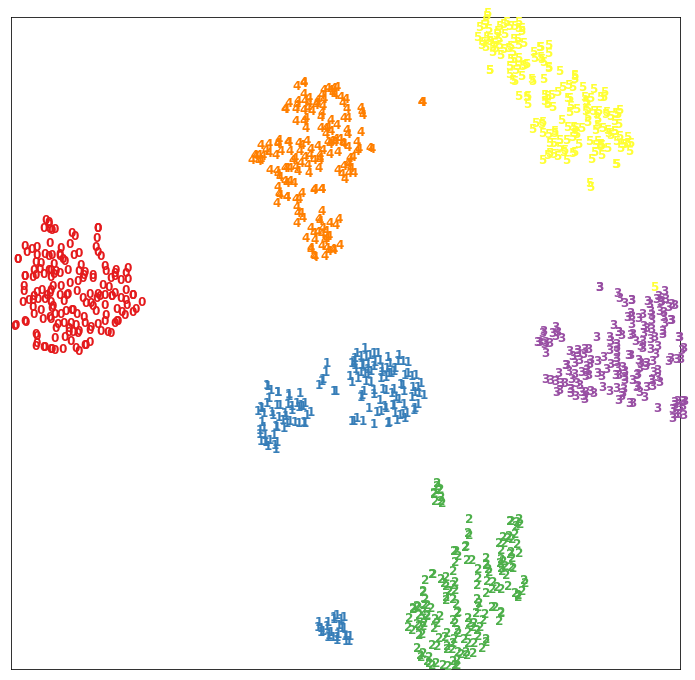

In [6]:
#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize

plt.figure(figsize = (12, 12))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color = plt.cm.Set1(y[i]), 
             fontdict={'weight' : 'bold', 'size': 12})
plt.xticks([])
plt.yticks([])
plt.show()

## Example 2 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

(-1.158245530989285,
 1.1483827835813787,
 -1.1477240879646022,
 1.1577390487349548)

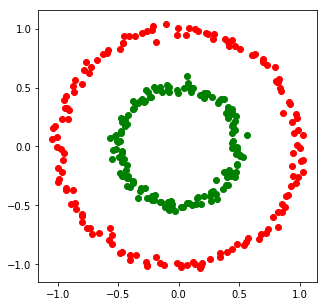

In [9]:
n_samples = 300
n_components = 2
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .03)

red = y == 0
green = y == 1

plt.subplots(figsize=(5, 5))
plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[green, 0], X[green, 1], c="g")
plt.axis('tight')

circles, perplexity=5 in 1.3 sec
circles, perplexity=30 in 1.7 sec
circles, perplexity=50 in 2 sec
circles, perplexity=100 in 2.1 sec


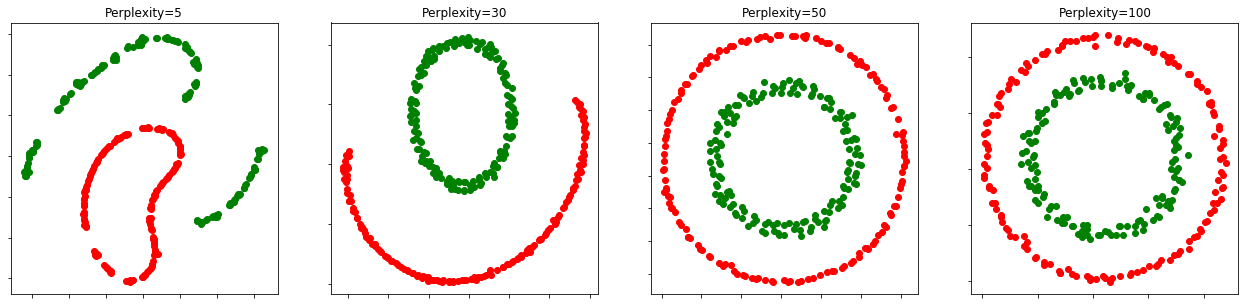

In [10]:
(fig, subplots) = plt.subplots(1, 4, figsize=(22, 5))

for i, perplexity in enumerate(perplexities):
    ax = subplots[ i ]

    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

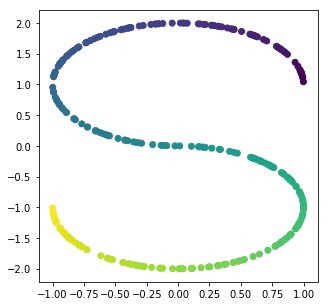

In [11]:
n_samples = 300
n_components = 2
perplexities = [5, 30, 50, 100]

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state = 0)

plt.subplots(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 2], c = color)

S-curve, perplexity=5 in 1.5 sec
S-curve, perplexity=30 in 1.8 sec
S-curve, perplexity=50 in 2.3 sec
S-curve, perplexity=100 in 2.9 sec


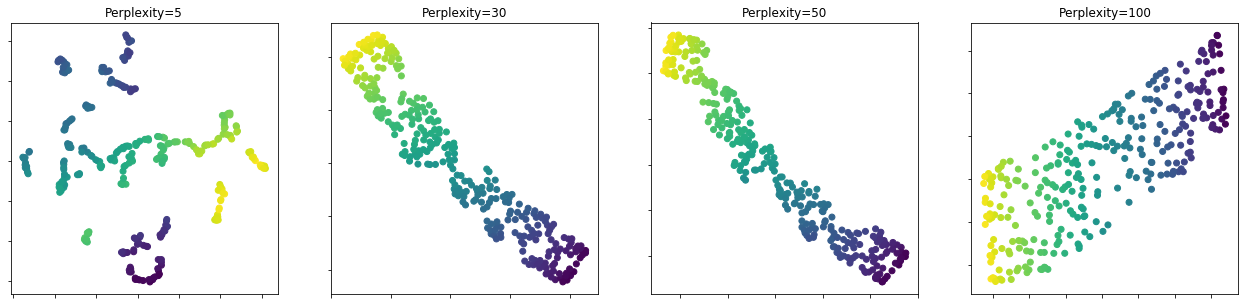

In [12]:
(fig, subplots) = plt.subplots(1, 4, figsize=(22, 5))
for i, perplexity in enumerate(perplexities):
    ax = subplots[ i ]

    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

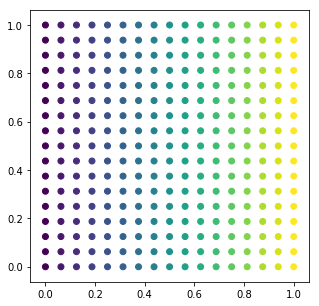

In [13]:
n_samples = 300
n_components = 2
perplexities = [5, 30, 50, 100]

# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()

plt.subplots(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=color)

(fig, subplots) = plt.subplots(1, 4, figsize=(22, 5))
for i, perplexity in enumerate(perplexities):
    ax = subplots[ i ]

    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()

# Citation 
 - http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html